In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
sys.path.append('/home/manu/TFG_repo/scripts')  # make modules in scripts folder callable from notebooks

In [4]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from datetime import datetime, timedelta
from utide import solve

In [5]:
from analysis_routines import *
from plotting_routines_xr import *
from harmonic_analysis import *
from wavelet_analysis import *
from processing_routines import datenum_to_epoch
plt.style.use('/home/manu/TFG_repo/notebooks/notebook.mplstyle')

In [6]:
def print_component(fit, G05, comp):
    amplitude = [fit.D1.A.loc[comp], fit.D1.A_ci.loc[comp], fit.a2.A.loc[comp], fit.a2.A_ci.loc[comp],
                G05.A.loc[comp], G05.A_ci.loc[comp]]
    
    phase = [fit.D1.g.loc[comp], fit.D1.g_ci.loc[comp], fit.a2.g.loc[comp], fit.a2.g_ci.loc[comp],
                G05.g.loc[comp], G05.g_ci.loc[comp]]
    print('ampl -> D1: {:.2f}+-{:.2f} m; a2: {:.5f}+-{:.5f} ºC; G05: {:.4f}+-{:.4f} ºC/m' .format(*amplitude))
    print('fase -> D1: {:.2f}+-{:.2f} º; a2: {:.5f}+-{:.5f} º; G05: {:.4f}+-{:.4f} º'.format(*phase))

In [7]:
df_ci = load_SHDR_fit('optimal_server_fit/AGL_20181116_fit_fci.csv')
data = load_time_series_xr('processed/AGL_20181116_chain_xrcompatible.nc')
G05 = pd.read_csv(data_dir / 'SHDR_fit/aux/G05.csv', index_col='date', parse_dates=True)
delta05_ci = pd.read_csv(data_dir / 'SHDR_fit/aux/delta05_ci.csv', index_col='date', parse_dates=True)

# Harmoic analysis & Utide
Nota 1: Filtrar M2 en las series de los termistores o de D1 no tiene efectos significativos sobre los demas constituyentes

Nota 2: Filtro lowpass para quitar ruido de altas frecuencias tmapoco tiene efectos significativos en en análisis con UTide 

## Completo

In [6]:
complete_ci = TidalComponentsFit.compute(df_ci, period=[None, None, 6])

In [7]:
complete_ci.clean()

In [11]:
complete_ci.D1

,period,PE,SNR,A,A_ci,g,g_ci
name,,,,,,,
M2,12.420601,5.618951,39.174451,2.928870,0.917180,47.610279,17.941438
K1,23.934470,3.675320,18.264360,2.368754,1.086360,146.534635,26.281745
2Q1,28.006223,2.024010,10.056212,1.757837,1.086470,245.726421,35.412104
L2,12.191620,1.483654,10.344140,1.505008,0.917165,16.728448,34.916092
O1,25.819342,1.074583,5.341629,1.280832,1.086204,266.146244,48.612076


## Periodo_1: Mareas internas en noviembre, MLD ~ 40 m

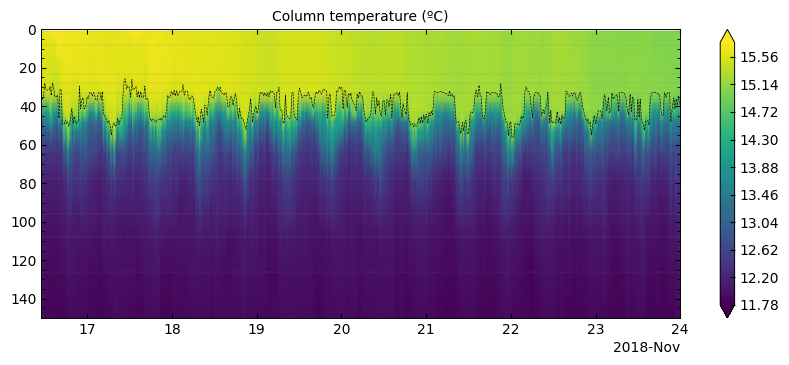

In [10]:
plot_column_temperature(data, df_ci, period=[None, date_1], ylims=[150, 0])

(0.05, 0.2)

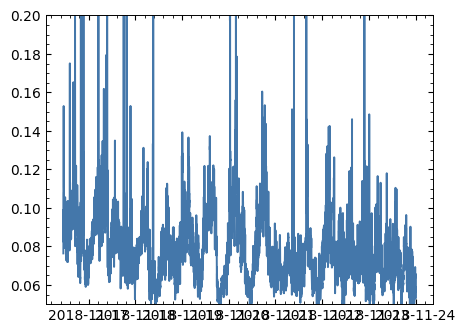

In [12]:
plt.plot(G05[:date_1:12])
plt.ylim(0.05, 0.2)

In [9]:
# trim time series
dn = 1 
date_1 = datetime(2018, 11, 24)
nov_ci = TidalComponentsFit.compute(df_ci, period=[None, date_1, dn])
nov_G05 = coef_dataframe(G05.x, period=[None, date_1, dn])
nov_delta05ci = coef_dataframe(delta05_ci.x, period=[None, date_1, dn])
#nov_ci.clean()

In [213]:
a = column_coefs([28, 33, 43, 48, 53, 63, 78, 96])
a.compute(data, period=[None, date_1])

In [233]:
nov_ci.D1

,period,PE,SNR,A,A_ci,g,g_ci
name,,,,,,,
M2,12.420601,91.212216,128.360171,4.358130,0.753948,4.559901,9.922482
M4,6.210301,4.156208,25.527518,0.930298,0.360889,10.268133,22.144801
M3,8.280401,2.334067,16.475463,0.697157,0.336641,132.402670,27.677507
K1,23.934470,1.166679,8.296263,0.492889,0.335401,331.125555,39.030855
M8,3.105150,0.459744,8.693144,0.309408,0.205683,14.015793,38.133342
2SK5,4.797373,0.257025,0.923917,0.231346,0.471738,180.839646,116.484874
2MK5,4.930880,0.178420,0.644205,0.192750,0.470695,299.424550,140.119531
3MK7,3.529641,0.148325,1.127673,0.175744,0.324373,263.505318,105.587342
M6,4.140200,0.087316,1.521941,0.134841,0.214229,183.904423,90.800918


In [231]:
print('-- M2 --')
print_component(nov_ci, nov_G05, 'M2')

-- M2 --
ampl -> D1: 4.36+-0.75 m; a2: 0.00687+-0.01024 ºC; G05: 0.0075+-0.0036 ºC/m
fase -> D1: 4.56+-9.92 º; a2: 176.78996+-85.50189 º; G05: 189.6778+-27.4229 º


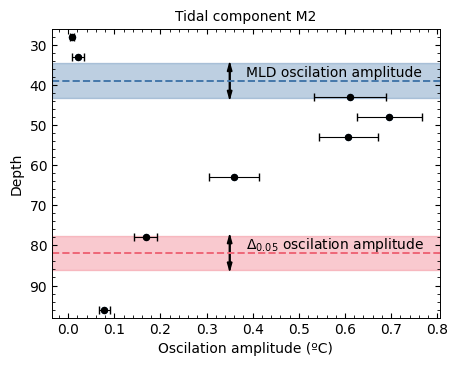

In [238]:
plot_column_oscilation(a, 'M2', nov_ci.D1, nov_delta05ci, pos1=[0.5, 0.835], pos2=[0.5, 0.24], x_arrow=0.35)

## Periodo_2: Mareas internas principios de diciembre
Mayor amplitud que en noviembre > columna menos estratificada

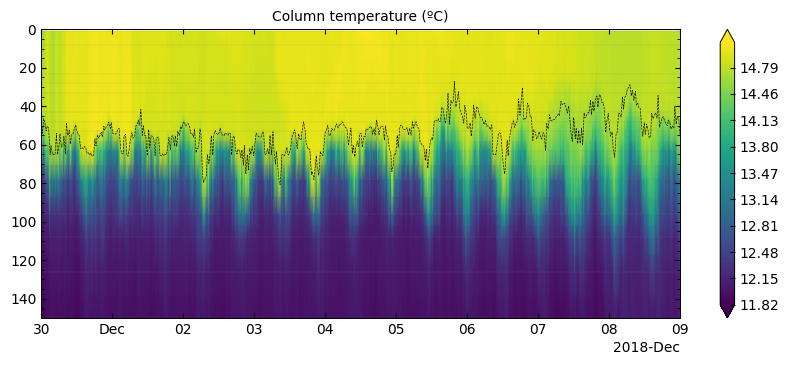

In [235]:
plot_column_temperature(data, df_ci, period=[date_2, date_3], ylims=[150, 0])

In [239]:
date_2 = datetime(2018, 11, 30)
date_3 = datetime(2018, 12, 9)
dn = 1 
dec_ci = TidalComponentsFit.compute(df_ci, period=[date_2, date_3, dn])
#dec_ci.clean()
dec_g05 = coef_dataframe(G05.x, period=[date_2, date_3, dn])
dec_delta05 = coef_dataframe(delta05_ci.x, period=[date_2, date_3, dn])

In [240]:
print('-- M2 --')
print_component(dec_ci, dec_g05, 'M2')

-- M2 --
ampl -> D1: 6.29+-0.76 m; a2: 0.00262+-0.00492 ºC; G05: 0.0066+-0.0024 ºC/m
fase -> D1: 8.09+-6.86 º; a2: 83.46951+-108.32035 º; G05: 209.1697+-20.5689 º


In [241]:
b = column_coefs([28, 33, 43, 48, 53, 63, 78, 96, 108])
b.compute(data, period=[date_2, date_3])
b.clean()

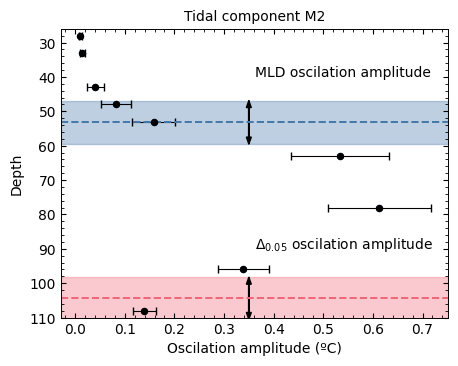

In [242]:
plot_column_oscilation(b, 'M2', dec_ci.D1, dec_delta05, pos1=[0.5, 0.835], pos2=[0.5, 0.24], x_arrow=0.35)

## Periodo_3:

In [13]:
date_6 = datetime(2019, 1, 5)
date_7 = datetime(2019, 1, 14) # o 14
dn = 1 # get datapoints every 60 seconds, not every 5
jan_ci = TidalComponentsFit.compute(df_ci, period=[date_6, date_7, dn])
jan_ci.clean()
jan_delta05 =  coef_dataframe(delta05_ci.x, period=[date_6, date_7, dn])
jan_g05 = coef_dataframe(G05.x, period=[date_6, date_7, dn])

In [15]:
print('ENERO')
print('M2:')
print_component(jan_ci, jan_g05, 'M2')
print('M4:')
print_component(jan_ci, jan_g05, 'M4')

ENERO
M2:
ampl -> D1: 7.82+-1.05 m; a2: 0.02161+-0.01405 ºC; G05: 0.0016+-0.0013 ºC/m
fase -> D1: 37.10+-7.65 º; a2: 191.90694+-37.07573 º; G05: 295.8417+-47.6083 º
M4:
ampl -> D1: 1.77+-0.95 m; a2: 0.01276+-0.00623 ºC; G05: 0.0009+-0.0007 ºC/m
fase -> D1: 182.79+-30.54 º; a2: 51.38740+-27.99433 º; G05: 314.6468+-47.3804 º


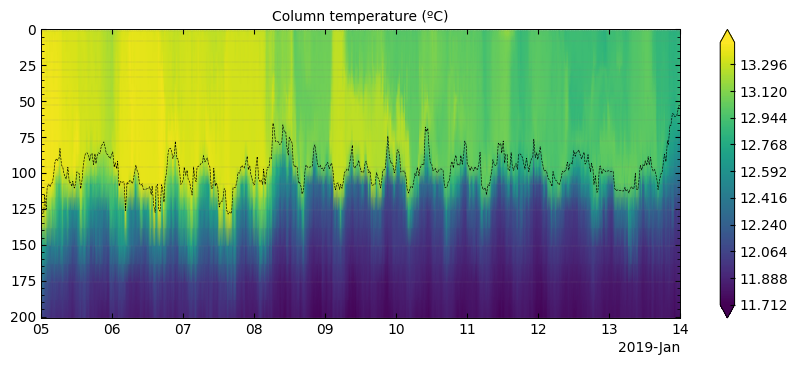

In [167]:
plot_column_temperature(data, df_ci, period=[date_6, date_7])

In [74]:
c = column_coefs([96, 108, 126, 151, 176])
c.compute(data, period=[date_6, date_7])
c.clean()

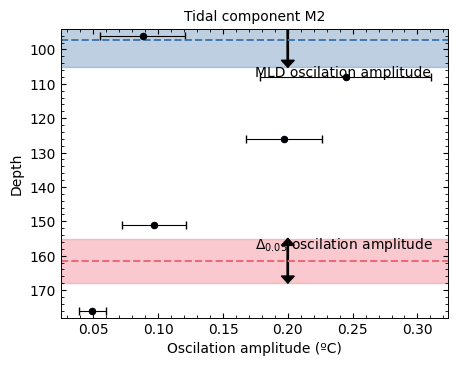

In [75]:
plot_column_oscilation(c, 'M2', jan_ci.D1, jan_delta05, pos1=[0.5, 0.835], pos2=[0.5, 0.24], x_arrow=0.2)

# ESPECTROS GLOBALES CON FFT

In [249]:
coriolis_frequency = 2*7.2921e-5*np.sin(np.deg2rad(data.lat.data)[0])
coriolis_freq_cps = coriolis_frequency/2/np.pi
coriolis_freq_cpd = coriolis_freq_cps*60*60*24
M2_cpd = 1/12.42061*24
M6_cpd = 1/4.14020*24
M4_cpd = 1/6.210301*24
K1_cpd = 1/23.934470*24
Q1_cpd = 1/28.006223*24
M3_cpd = 1/8.280401*24
M8_cpd = 1/3.105150*24
O1_cpd = 1/1/25.819351*24 # not present in temperature record
Q1_2_cpd = 1/28.006223*24

In [243]:
D1_ = df_ci['D1']
freqs_D1, psd_D1, dof_D1 = windowed_spectrum(D1_, 5/60/60/24, 28, 3) #window 42.67

In [244]:
a2_ = df_ci['a2']
freqs_a2, psd_a2, dof_a2 = windowed_spectrum(a2_, 5/60/60/24, 28, 3) #window 42.67

In [245]:
a1_ = df_ci['a1']
freqs_a1, psd_a1, dof_a1 = windowed_spectrum(a1_, 5/60/60/24, 28, 3) #window 42.67

In [246]:
freqs_G05, psd_G05, dof_G05 = windowed_spectrum(G05.x, 5/60/60/24, 28, 3) #window 42.67

In [247]:
temp_8 = data.temp[:, 8].data
freqs_temp_8, psd_temp_8, dof_temp_8 = windowed_spectrum(temp_8, 5/60/60/24, 28, 3) #window 42.673
temp_7 = data.temp[:, 7].data
freqs_temp_7, psd_temp_7, dof_temp_7 = windowed_spectrum(temp_7, 5/60/60/24, 28, 3) #window 42.67

temp_10 = data.temp[:, 10].data
freqs_temp_10, psd_temp_10, dof_temp_10 = windowed_spectrum(temp_10, 5/60/60/24, 28, 3) #window 42.67

temp_14 = data.temp[:, 14].data
freqs_temp_14, psd_temp_14, dof_temp_14 = windowed_spectrum(temp_14, 5/60/60/24, 28, 3) #window 42.67

temp_4 = data.temp[:, 4].data
freqs_temp_4, psd_temp_4, dof_temp_4 = windowed_spectrum(temp_4, 5/60/60/24, 28, 3) #window 42.67

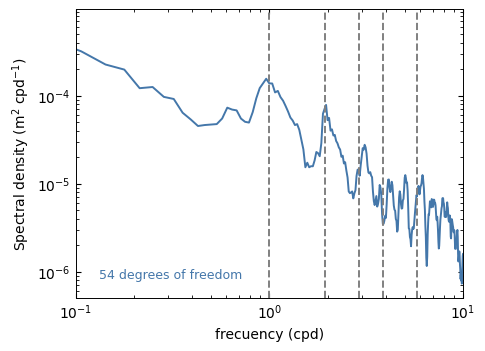

In [252]:
plot_spectrum(freqs_G05, psd_G05, dof_G05, 'cpd', 'm', vlines=[, M2_cpd, M4_cpd, M3_cpd, M6_cpd], 
              xlim=(10**-1, 10**1), ylim=(5*10**-7, None))

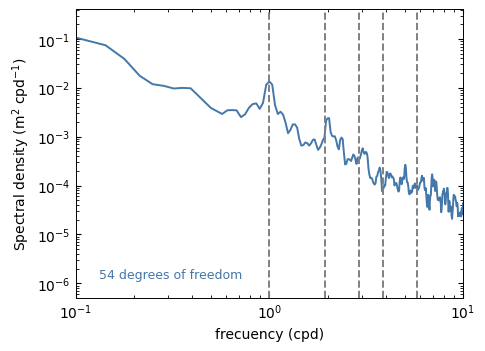

In [257]:
plot_spectrum(freqs_a1, psd_a1, dof_a1, 'cpd', 'm', vlines=[1, M2_cpd, M4_cpd, M6_cpd, M3_cpd], 
              xlim=(10**-1, 10**1), ylim=(5*10**-7, None))

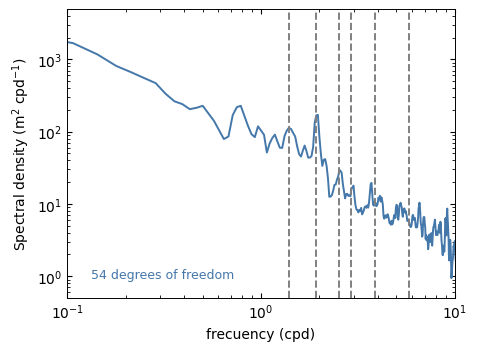

In [19]:
plot_spectrum(freqs_D1, psd_D1, dof_D1, 'cpd', 'm', vlines=[1*coriolis_freq_cpd, M2_cpd, M3_cpd, 1/9.5*24, M6_cpd, M4_cpd], 
              xlim=(10**-1, 10**1), ylim=(5*10**-1,None))

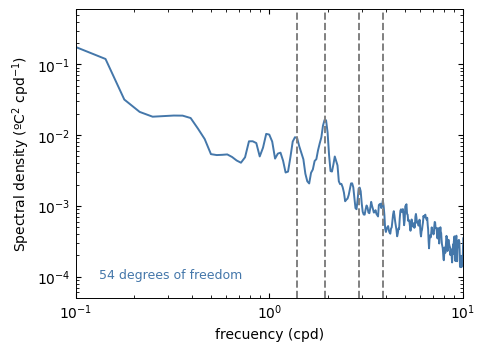

In [398]:
plot_spectrum(freqs_a2, psd_a2, dof_a2, 'cpd', 'ºC', vlines=[1*coriolis_freq_cpd, M2_cpd, M3_cpd, M4_cpd], 
              xlim=(10**-1, 10**1), ylim=(5*10**-5, None))

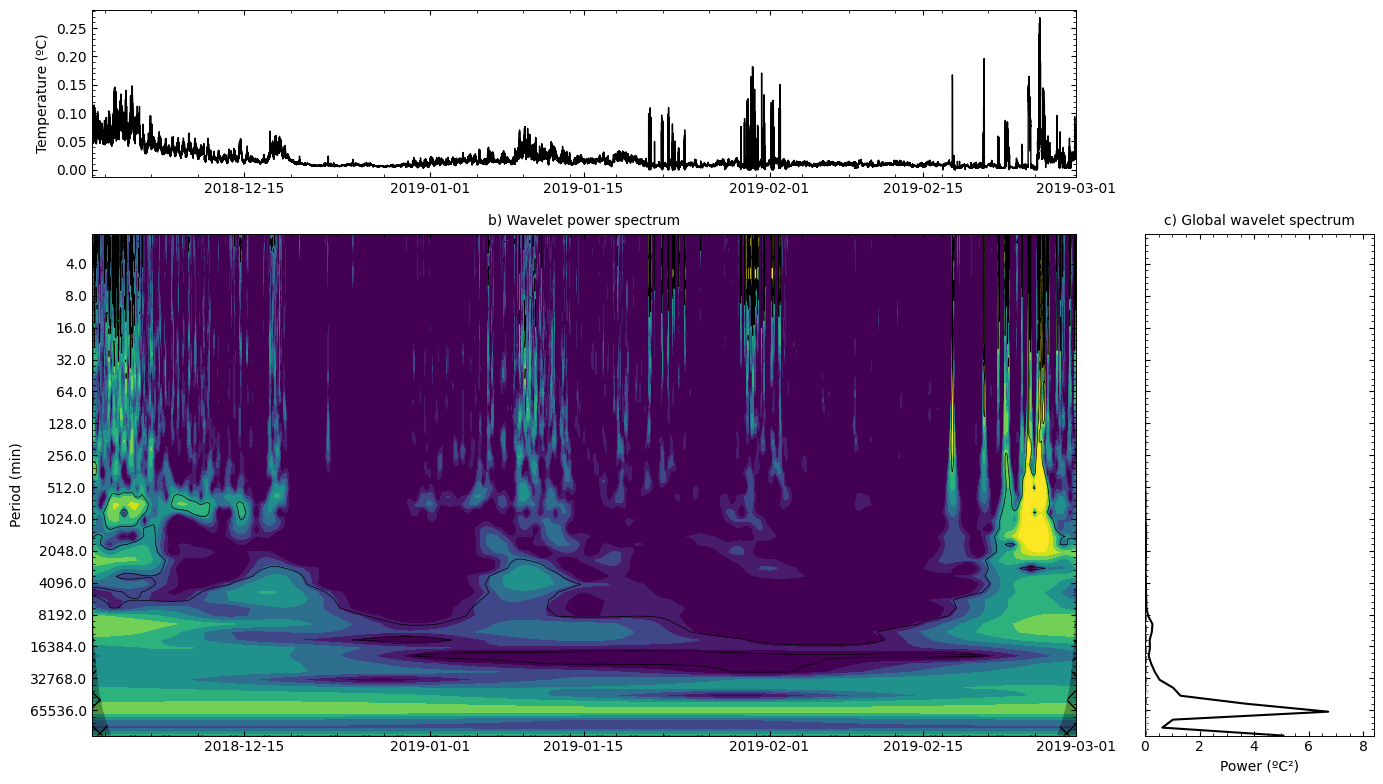

In [29]:
wavelet_power_spectrum(G05.x, data.date, period=[datetime(2018, 12, 1), datetime(2019, 3, 1), 12], norm_levels=2**9)

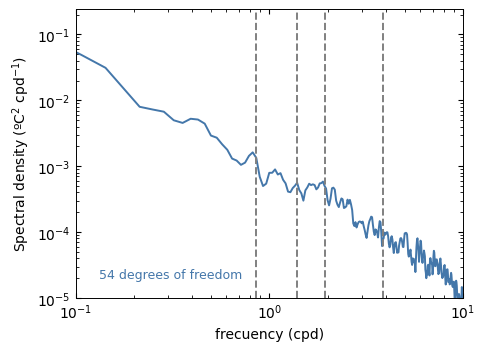

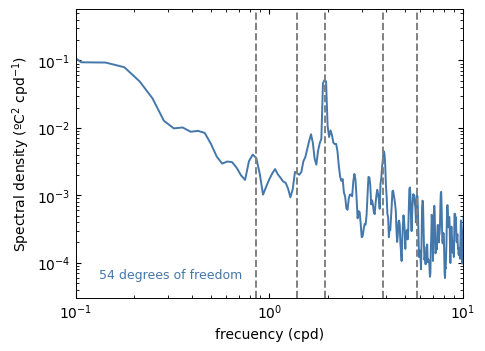

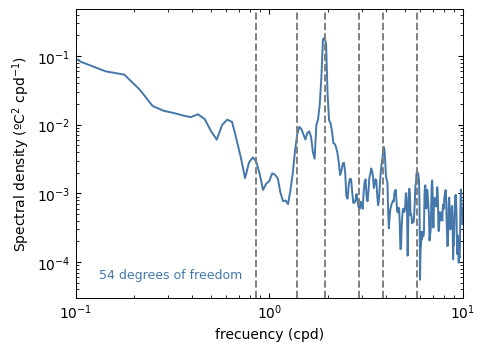

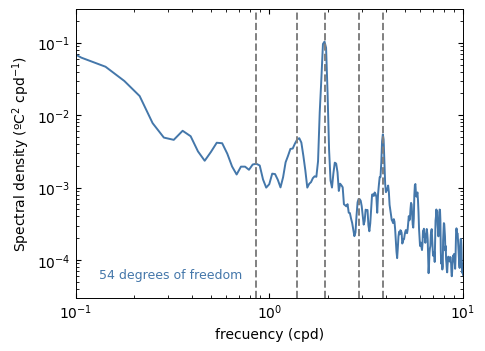

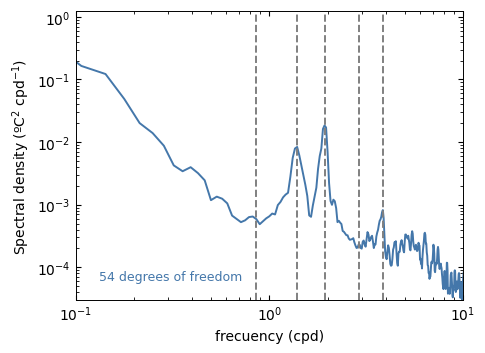

In [268]:
plot_spectrum(freqs_temp_4, psd_temp_4, dof_temp_4, 'cpd', 'ºC', 
              vlines=[1*coriolis_freq_cpd, M2_cpd, M4_cpd, Q1_2_cpd], 
              xlim=(10**-1, 10**1), ylim=(1*10**-5, None))

plot_spectrum(freqs_temp_7, psd_temp_7, dof_temp_7, 'cpd', 'ºC', 
              vlines=[1*coriolis_freq_cpd, M2_cpd, M4_cpd, Q1_2_cpd, M6_cpd], 
              xlim=(10**-1, 10**1), ylim=(3*10**-5, None))

plot_spectrum(freqs_temp_8, psd_temp_8, dof_temp_8, 'cpd', 'ºC', 
              vlines=[1*coriolis_freq_cpd, M2_cpd, M4_cpd, Q1_2_cpd, M6_cpd, M3_cpd], 
              xlim=(10**-1, 10**1), ylim=(3*10**-5, None))

plot_spectrum(freqs_temp_10, psd_temp_10, dof_temp_10, 'cpd', 'ºC', 
              vlines=[1*coriolis_freq_cpd, M2_cpd, M4_cpd, Q1_2_cpd, M3_cpd], 
              xlim=(10**-1, 10**1), ylim=(3*10**-5, None))

plot_spectrum(freqs_temp_14, psd_temp_14, dof_temp_14, 'cpd', 'ºC', 
              vlines=[1*coriolis_freq_cpd, M2_cpd, M4_cpd, Q1_2_cpd, M3_cpd], 
              xlim=(10**-1, 10**1), ylim=(3*10**-5, None))

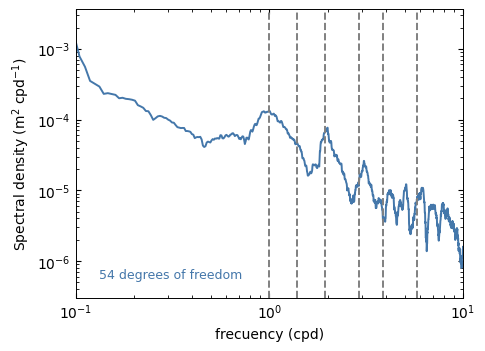

In [289]:
freqs, amplitude, power, psd, dof = spectrum(G05.x.to_numpy(), 5/60/60/24, 27)
plot_spectrum(freqs, psd, dof, 'cpd', 'm', vlines=[1, M2_cpd, M4_cpd, M3_cpd, M6_cpd, coriolis_freq_cpd], 
              xlim=(10**-1, 10**1), ylim=(3*10**-7, None))

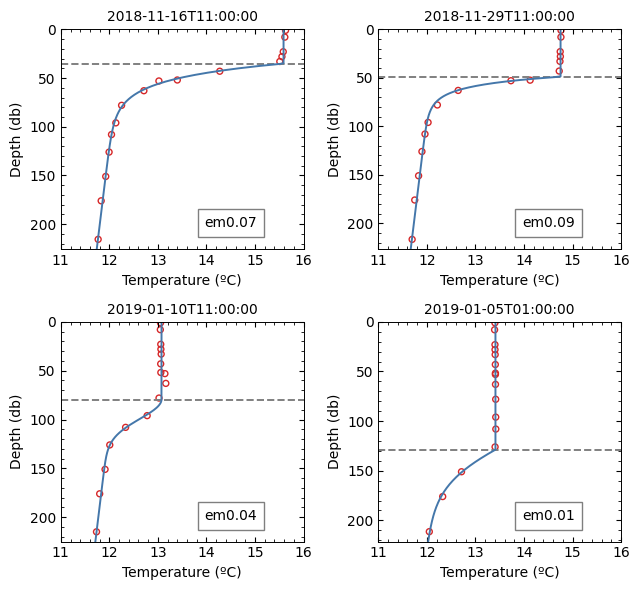

In [254]:
# perfiles de los tres periodos
dates_ = [datetime(2018, 11, 16, 11), datetime(2018, 11, 29, 11), 
          datetime(2019, 1, 10, 11), datetime(2019, 1, 5, 1)]
plot_multiple_profiles(df_ci, data, dates_)